# Comprensión de los Datos

In [10]:
#importa librerías
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Descripción de Variables


Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd): Categórica Nominal
survival Survival (0 = No; 1 = Yes)  : Categórica Nominal 
name Name : Categórica Nominal
sex Sex : Categórica Nominal
age Age : Cuantitativa Discreta
sibsp Number of Siblings/Spouses Aboard : Cuantitativa Discreta
parch Number of Parents/Children Aboard : Cuantitativa Discreta
ticket Ticket Number : Categórica Nominal
fare Passenger Fare (British pound) : Cuantitativa Continua
cabin Cabin : Categórica Nominal
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) : Categórica Nominal

**Ejemplo:** Crear un objeto DataFrame con base en un archivo .csv

In [3]:
#lee archivo csv
titanic = pd.read_csv("titanic.csv")

In [3]:
#Usa función shape para revisar el total de renglones y columnas
titanic.shape

(891, 12)

In [4]:
#Revisa los primeros 5 renglones del dataset usando la función head()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Revisa los últimos 5 renglones del dataset usando la función tail()
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Revisa la información mas completa del conjunto de datos usando la función info()
#Muestra el total de datos, las columnas y su tipo correspondiente, dice si contiene nulos o no
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#revisa cuántos valores únicos tiene cada atributo del archivo usando la función nunique()
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploración de Datos

In [8]:
#utiliza la función describe() para obtener estadística básica. se puede incluir -0
titanic.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
#Revisa Valores nulos con funcion isnull().sum()
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Revisar valores únicos por columna usando función unique(): nombre-columna.unique()
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Variables Cuantitativas

### Medidas de tendencia central


In [11]:
#Edad
#Se puede obtener la media, mediana y moda para
mean_age = titanic['Age'].mean()
median_age =titanic['Age'].median()
mode_age = titanic['Age'].mode()
print("Mean_age:",mean_age)
print("Median_age:",median_age)
print("Mode_age:",mode_age)

Mean_age: 29.69911764705882
Median_age: 28.0
Mode_age: 0    24.0
Name: Age, dtype: float64


Conclusiones:
La edad promedio fue 29
La edad al centro es 28
La edad más repetida fue de 24

# Variables Categóricas

In [12]:
#Para conteo  de cada valor en una columna, en orden descendente usar función value_counts():    
# nombreDataframe.columna.value_counts()
# nombreDataframe['columna'].value_counts()
titanic.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [13]:
#Revisa conteo de varias columnas
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
# Crear variable familySize que incluya la suma de las columnas SibSp y Parch
# Mostrar el total por cada tamaño de familia
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

In [15]:
titanic["FamilySize"].value_counts()
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2


## Consulta

In [16]:
# df.iloc[i]: Accede a la fila en la posición i.
# Acceder a la primera fila
titanic.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
FamilySize                           2
Name: 0, dtype: object

In [17]:
# Acceder a las dos primeras filas
titanic.iloc[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [18]:
#Seleccionar columnas, indicando entre corchetes [nombreColumna, nombreColumna]
titanic[["Name", "Age"]]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [19]:
#Selección de filas [indicar dataframe[columna] operador valor]
sobrevivientes = titanic[titanic["Survived"] == 0]

In [20]:
#ordenar usando funcion sort_values(by=atributo, ascending=True/false)
sobrevivientes.sort_values(by="Age", ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,6
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,8
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S,6
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,2
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


In [25]:
#Agrupar por un atributo y calcular función de agregación utilizando groupby(atributo)['atributoAgregacion].funcion() (ej. mean() para promedio)
sobrevivientes.groupby("Pclass")["Fare"].mean()

Pclass
1    64.684007
2    19.412328
3    13.669364
Name: Fare, dtype: float64

Crea un subconjunto de **titanic** para el costo mayor a 500

In [ ]:
# usa el criterio para extraer solo los boletos caros con fare > 50


# Visualización y Análisis de Datos

Mediana:  28.0
Media:  29.69911764705882
float64


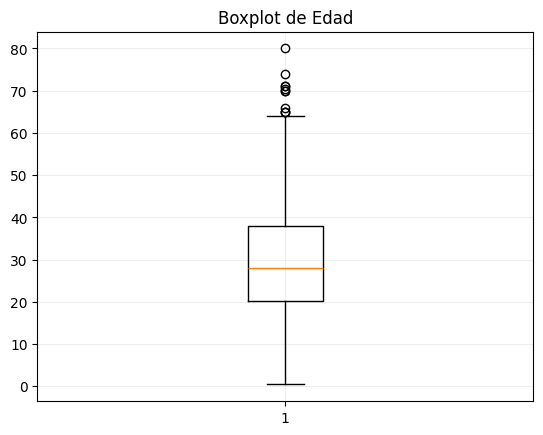

In [8]:
print("Mediana: ", titanic["Age"].median())
print("Media: ", titanic["Age"].mean())
print(titanic["Age"].dtype)
titanic["Age"].isnull().sum()

plt.boxplot(titanic["Age"].dropna())
plt.title("Boxplot de Edad")
plt.grid(alpha=0.2); plt.show()

Text(0.5, 1.0, 'Boxplot de Edad')

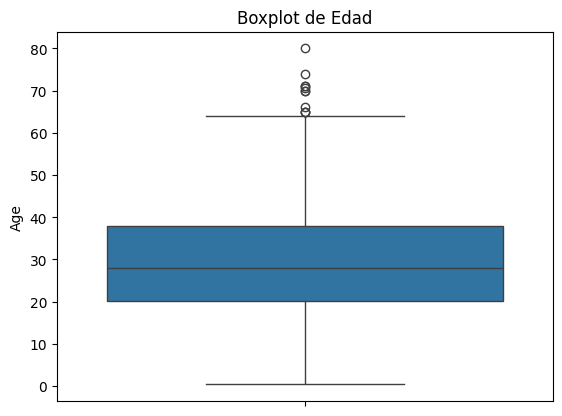

In [13]:
sns.boxplot(titanic["Age"])
plt.title("Boxplot de Edad")

In [14]:
q1, mediana, q3 = np.percentile(titanic["Age"], [25, 50, 75])
print("el 75% de las personas tienen edad debajo de", q1)
print("el 25% de las personas tienen edad arriba de", q3)

el 75% de las personas tienen edad debajo de nan
el 25% de las personas tienen edad arriba de nan


Text(0.5, 1.0, 'Edad de acuerdo a sobrevivientes')

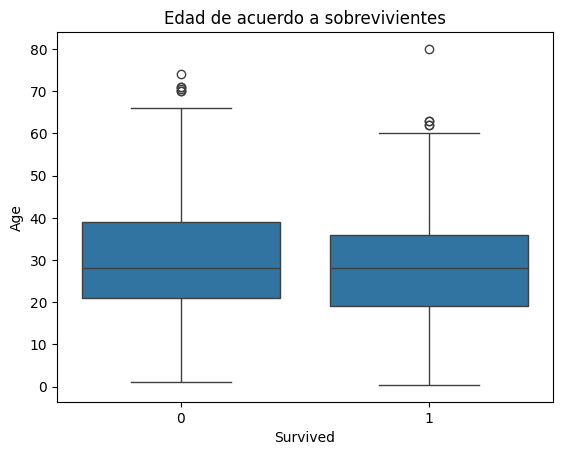

In [15]:
sns.boxplot(titanic, x="Survived", y="Age")
plt.title("Edad de acuerdo a sobrevivientes")

In [17]:
variables_numericas = titanic.select_dtypes(include="number")
matriz_correlacion  = variables_numericas.corr().round(2)
matriz_correlacion

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


Text(0.5, 1.0, "Matriz de Correlación del archivo 'Titanic.csv'")

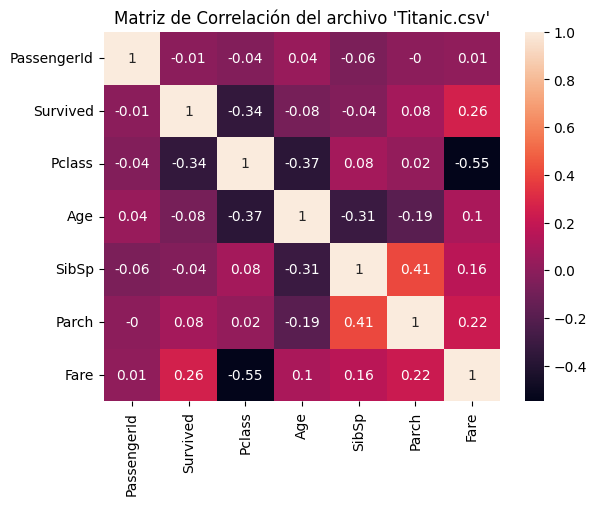

In [18]:
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de Correlación del archivo 'Titanic.csv'")